In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv"

In [4]:
df = pd.read_csv(r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv", encoding= 'unicode_escape')

### Decision Tree Regressor


In [5]:
# Drop unwanted columns
columns_to_drop = ['instant', 'casual', 'registered','dteday','atemp']
df = df.drop(columns=columns_to_drop)
print(f"Unwanted columns are: {columns_to_drop}")

Unwanted columns are: ['instant', 'casual', 'registered', 'dteday', 'atemp']


In [6]:
# Create weekend column (1 if weekend, 0 if not weekend)
df['weekend'] = ((df['weekday'] == 0) | (df['weekday'] == 6)).astype(int)
print("Created weekend column (1 for weekend, 0 for weekday)")

Created weekend column (1 for weekend, 0 for weekday)


In [7]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,1
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [11]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['season',
 'yr',
 'workingday',
 'weekday',
 'holiday',
 'temp',
 'windspeed',
 'weekend',
 'mnth',
 'weathersit',
 'hum']

In [12]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_train[0:10]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,weekend
97,2,0,4,0,5,1,2,0.335833,0.836250,0.226992,0
503,2,1,5,0,5,1,1,0.564167,0.523333,0.136817,0
642,4,1,10,0,4,1,2,0.657500,0.722917,0.117546,0
498,2,1,5,0,0,0,1,0.612500,0.576250,0.225117,1
303,4,0,10,0,1,1,1,0.340000,0.703333,0.106350,0
570,3,1,7,0,2,1,1,0.750833,0.655000,0.211454,0
250,3,0,9,0,4,1,3,0.633913,0.939565,0.192748,0
17,1,0,1,0,2,1,2,0.216667,0.861667,0.146775,0
595,3,1,8,0,6,0,1,0.678333,0.603333,0.177867,1
240,3,0,8,0,1,1,1,0.636667,0.554583,0.159825,0


In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 11)
(584,)
(147, 11)
(147,)


In [17]:
X_train[0:10]

array([[0.33333333, 0.        , 0.27272727, 0.        , 0.83333333,
        1.        , 0.5       , 0.35024023, 0.80442593, 0.48605788,
        0.        ],
       [0.33333333, 1.        , 0.36363636, 0.        , 0.83333333,
        1.        , 0.        , 0.63925722, 0.35526299, 0.24873701,
        0.        ],
       [1.        , 1.        , 0.81818182, 0.        , 0.66666667,
        1.        , 0.5       , 0.75739478, 0.64174706, 0.19801995,
        0.        ],
       [0.33333333, 1.        , 0.36363636, 0.        , 0.        ,
        0.        , 0.        , 0.7004354 , 0.43122037, 0.48112329,
        1.        ],
       [1.        , 0.        , 0.81818182, 0.        , 0.16666667,
        1.        , 0.        , 0.35551467, 0.61363607, 0.16855453,
        0.        ],
       [0.66666667, 1.        , 0.54545455, 0.        , 0.33333333,
        1.        , 0.        , 0.87553235, 0.54425859, 0.44516526,
        0.        ],
       [0.66666667, 0.        , 0.72727273, 0.        , 0.

In [18]:
from sklearn.tree import DecisionTreeRegressor

D_tree = DecisionTreeRegressor(max_depth=9, splitter='best', max_features=None)

D_tree.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [19]:
D_tree.score(X_test,y_test)

0.7857044529758171

In [20]:
y_pred_train = D_tree.predict(X_train)
y_pred = D_tree.predict(X_test)

In [21]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 5.296303419443902.
The Mean Squred Error(MSE) is 60.8719540177582.
The Root Mean Squared Error(RMSE) is 7.802048065588817.
The R2 Score is 0.7857044529758171.
Adjusted R2 is 0.7682433343294023.


In [22]:
test_dict = {'Model':"Decision Tree Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [24]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Decision Tree Regressor(GridsearchCV),5.2963,60.872,7.802,0.7857,0.7682


In [25]:
lasso_rg = Ridge()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
 
lasso_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [26]:
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -56.96189103741192


In [27]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [28]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [29]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

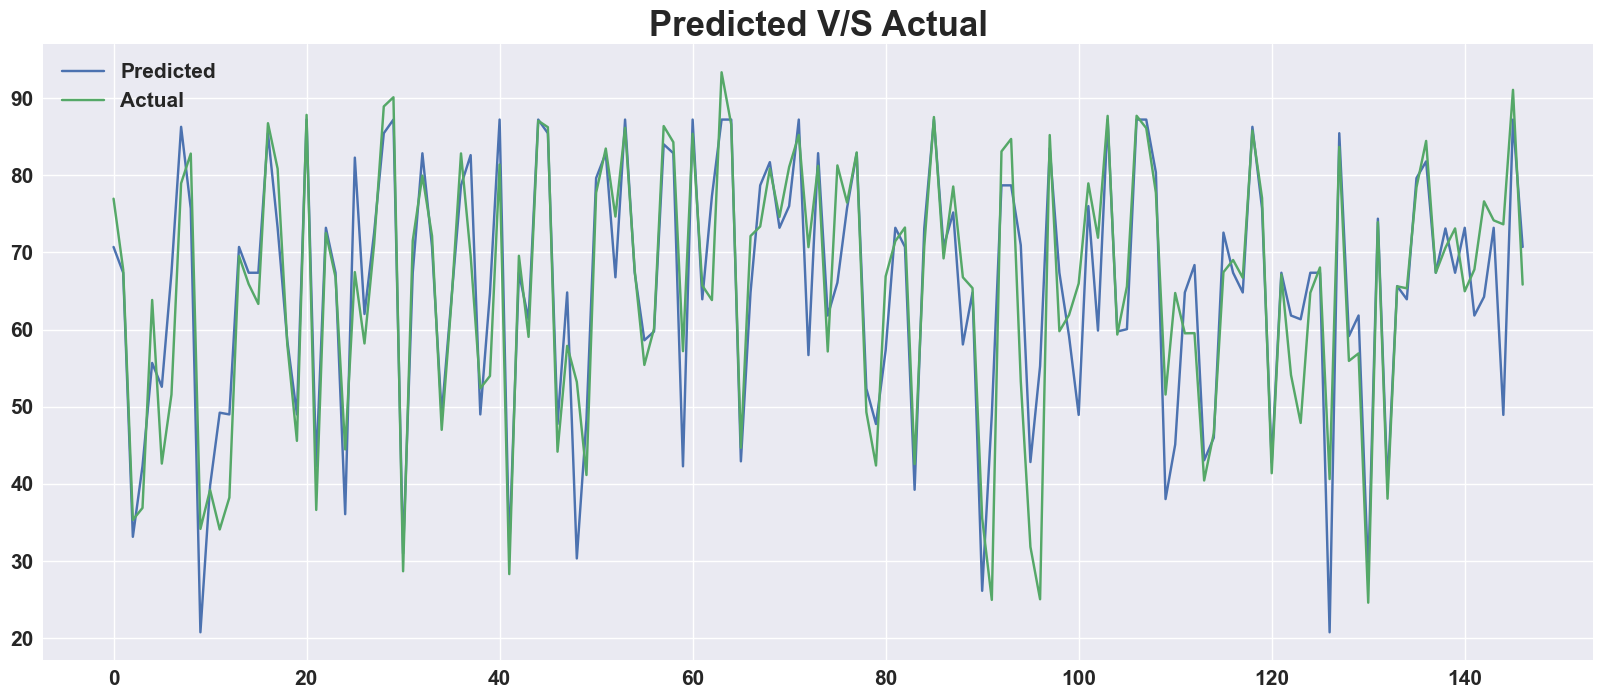

In [34]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

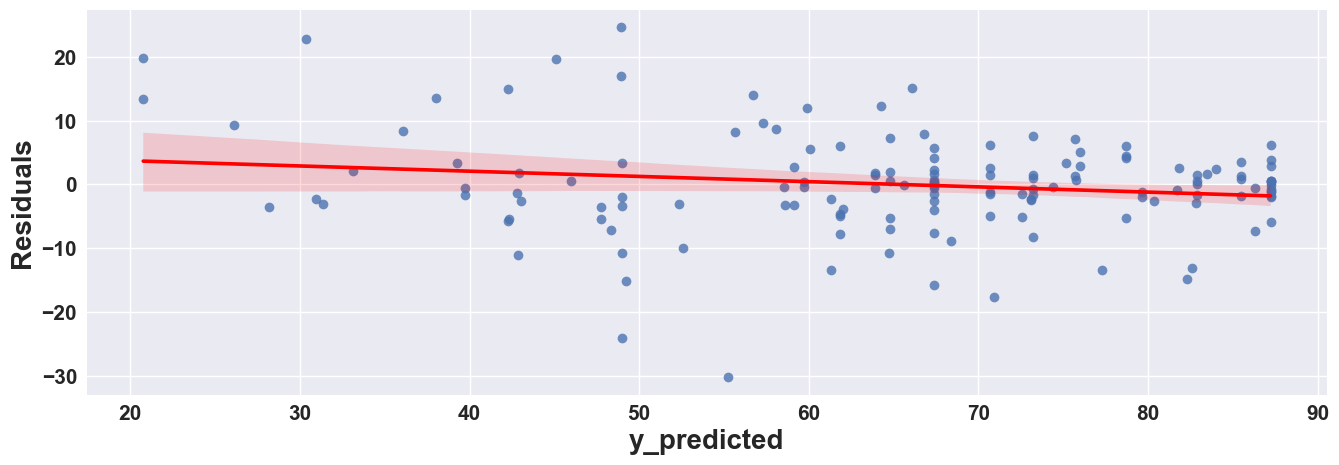

In [35]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

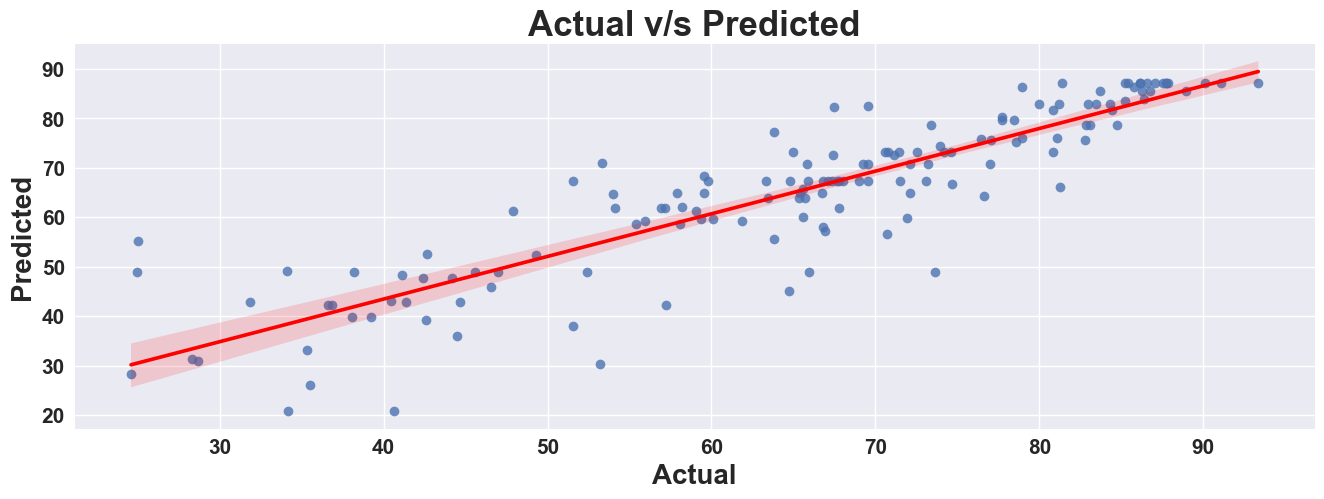

In [36]:
plot_scatter(y_pred,y_test)

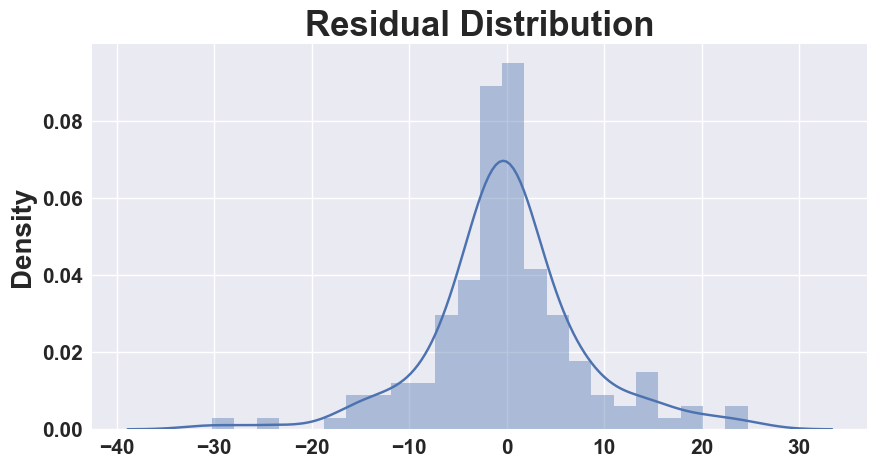

In [37]:
Residual_distPlot(y_pred,y_test)

In [38]:
# Hyper parameters range intialization for tuning 
tree = DecisionTreeRegressor()
parameters=parameters = parameters = {
    'criterion': ['squared_error', 'absolute_error'],  
    'max_depth': [5, 7, 9],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2']
}


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(random_state=42)

tuning_model = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [5, 7, ...], 'max_features': [None, 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [40]:
print(f'The best parameter is {tuning_model.best_params_}')
print(f'The best negative mean squred error value is {tuning_model.best_score_}')

The best parameter is {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}
The best negative mean squred error value is -59.50139278383342


In [41]:
from sklearn.tree import DecisionTreeRegressor

D_tree = DecisionTreeRegressor(max_depth=9, max_features=None, splitter='best', random_state=42)
D_tree.fit(X_train, y_train)

D_tree.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Text(0.5, 0, 'Relative Importance')

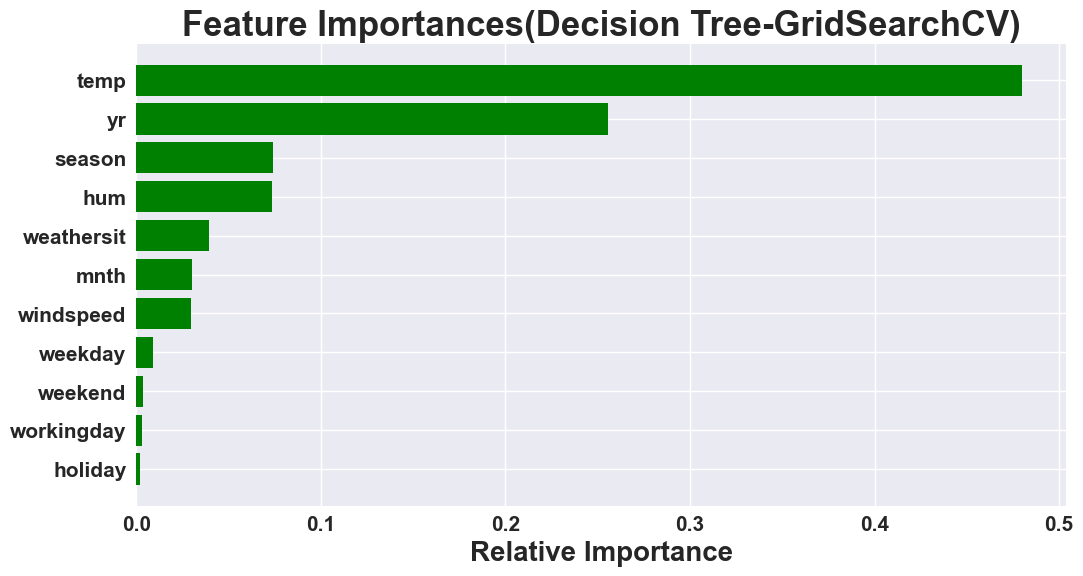

In [42]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')